In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Load each CSV file into a DataFrame
df1 = pd.read_csv(r'C:\Users\Public\SMART_CITY_TRAFFIC_PATTERN_DS_one.csv')
df2 = pd.read_csv(r'C:\Users\Public\SMART_CITY_TRAFFIC_PATTERN_DS_two.csv')
df3 = pd.read_csv(r'C:\Users\Public\SMART_CITY_TRAFFIC_PATTERN_DS_three.csv')
df4 = pd.read_csv(r'C:\Users\Public\SMART_CITY_TRAFFIC_PATTERN_DS_four.csv')
df5 = pd.read_csv(r'C:\Users\Public\SMART_CITY_TRAFFIC_PATTERN_DS_fifth.csv')

# Merge the DataFrames side by side
merged_df = pd.concat([df1, df2, df3, df4, df5], axis=1)

In [3]:
#Data set columns and records count:
print("Number of Columns :",len(merged_df.columns))
print("Number of Records :",len(merged_df))

Number of Columns : 54
Number of Records : 2984859


In [4]:
#Displaying first five records:
merged_df.head()

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,timestamp,...,DAY_OF_WEEK,MONTH,DESCRIPTION,RECORD_ID,WEST,EAST,SOUTH,NORTH,NW_LOCATION,SE_LOCATION
0,414.0,5838 West,Lake St,11/14/2006,7100.0,East Bound: 3600 / West Bound: 3500,41.887904,-87.771064,"(41.887904, -87.771064)",2022-08-01 00:00:00,...,1,4,Pershing to Roosevel. Western to Stewart,15-201804300240,-87.685372,-87.636322,41.822792,41.866129,POINT (-87.685372 41.866129),POINT (-87.636322 41.822792)
1,176.0,320 East,76th St,03/28/2006,8600.0,East Bound: 3800 / West Bound: 4800,41.756542,-87.617335,"(41.756542, -87.617335)",2022-08-01 00:29:00,...,1,4,71st to Pershing. Cicero to Western,18-201804300240,-87.747456,-87.683730,41.764066,41.822792,POINT (-87.747456 41.822792),POINT (-87.68373 41.764066)
2,1367.0,1730 East,57th Dr,08/24/2006,53500.0,East Bound: 27800 / West Bound: 25700,41.792663,-87.582231,"(41.792663, -87.582231)",2022-08-01 00:58:00,...,1,4,71st to Pershing. Cottage Grove to Lake Shore,21-201804300240,-87.606334,-87.566260,41.764066,41.822792,POINT (-87.606334 41.822792),POINT (-87.56626 41.764066)
3,316.0,125 East,24th St,03/30/2006,700.0,East Bound: 400 / West Bound: 300,41.849302,-87.622658,"(41.849302, -87.622658)",2022-08-01 01:00:00,...,1,4,91st to 71st. Cicero to Damen,22-201804300240,-87.747456,-87.672980,41.728472,41.764066,POINT (-87.747456 41.764066),POINT (-87.67298 41.728472)
4,1294.0,2924 East,130th St,08/29/2006,4200.0,East Bound: 2300 / West Bound: 1900,41.659177,-87.552112,"(41.659177, -87.552112)",2022-08-01 01:18:00,...,1,4,91st to 71st. Damen to Cottage Grove,23-201804300240,-87.672980,-87.606334,41.728472,41.764066,POINT (-87.67298 41.764066),POINT (-87.606334 41.728472)


In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2984859 entries, 0 to 2984858
Data columns (total 54 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   ID                                           float64
 1   Traffic Volume Count Location  Address       object 
 2   Street                                       object 
 3   Date of Count                                object 
 4   Total Passing Vehicle Volume                 float64
 5   Vehicle Volume By Each Direction of Traffic  object 
 6   Latitude                                     float64
 7   Longitude                                    float64
 8   Location                                     object 
 9   timestamp                                    object 
 10  congestion_level                             float64
 11  weather_conditions                           object 
 12  road_type                                    object 
 13  vehicle_type

In [6]:
merged_df.isnull().sum()

ID                                             2983580
Traffic Volume Count Location  Address         2983580
Street                                         2983580
Date of Count                                  2983580
Total Passing Vehicle Volume                   2983580
Vehicle Volume By Each Direction of Traffic    2983580
Latitude                                       2983580
Longitude                                      2983580
Location                                       2983580
timestamp                                      2951956
congestion_level                               2951956
weather_conditions                             2951956
road_type                                      2951956
vehicle_type                                   2951956
temperature                                    2951956
humidity                                       2951956
wind_speed                                     2951956
precipitation                                  2951956
population

In [7]:
merged_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,1279.0,NaN,NaN,NaN,689.937451,395.568121,1.0,348.5,684.0,1028.5,1382.0
Traffic Volume Count Location Address,1279,1203,210 South,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Street,1279,251,Damen Ave,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date of Count,1279,95,03/28/2006,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Passing Vehicle Volume,1279.0,NaN,NaN,NaN,19466.301798,12448.378467,700.0,11350.0,17300.0,24200.0,165200.0
Vehicle Volume By Each Direction of Traffic,1279,1223,North Bound: 6300 / South Bound: 6200,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Latitude,1279.0,NaN,NaN,NaN,41.849394,0.083917,41.651861,41.780249,41.87138,41.909196,42.017888
Longitude,1279.0,NaN,NaN,NaN,-87.670298,0.060891,-87.854842,-87.710013,-87.66285,-87.628631,-87.529702
Location,1279,1276,"(41.828474, -87.65091)",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
timestamp,32903,32903,2022-08-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Data cleaning removing all duplicates and filling null values to zeros
df_dedup = merged_df.drop_duplicates(keep=False)
df_fin = df_dedup.dropna()
print("Number of records after removing duplicates :")
df_fin.count()

Number of records after removing duplicates :


ID                                             1279
Traffic Volume Count Location  Address         1279
Street                                         1279
Date of Count                                  1279
Total Passing Vehicle Volume                   1279
Vehicle Volume By Each Direction of Traffic    1279
Latitude                                       1279
Longitude                                      1279
Location                                       1279
timestamp                                      1279
congestion_level                               1279
weather_conditions                             1279
road_type                                      1279
vehicle_type                                   1279
temperature                                    1279
humidity                                       1279
wind_speed                                     1279
precipitation                                  1279
population_density                             1279
traffic_volu

Rainy_days: 413
Cloudy_days: 416
Clear_days: 450


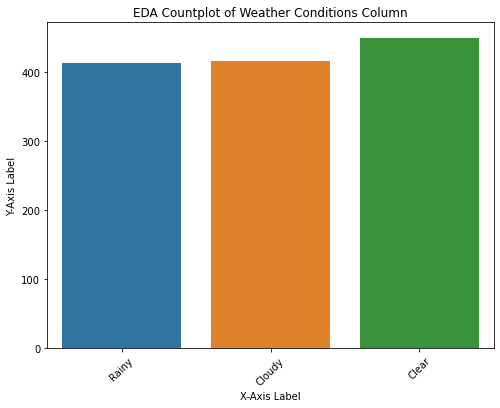

In [9]:
value_counts = df_fin['weather_conditions'].value_counts()

Rainy_days = value_counts.get("Rainy", 0)
Cloudy_days = value_counts.get("Cloudy", 0)
Clear_days = value_counts.get("Clear", 0)
print('Rainy_days:',Rainy_days)
print('Cloudy_days:',Cloudy_days)
print('Clear_days:',Clear_days)

plt.figure(figsize=(8, 6))
sns.countplot(df_fin['weather_conditions'])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA Countplot of Weather Conditions Column')
plt.xticks(rotation=45)
plt.show()

City Street: 408
Highway: 443
Residential: 428


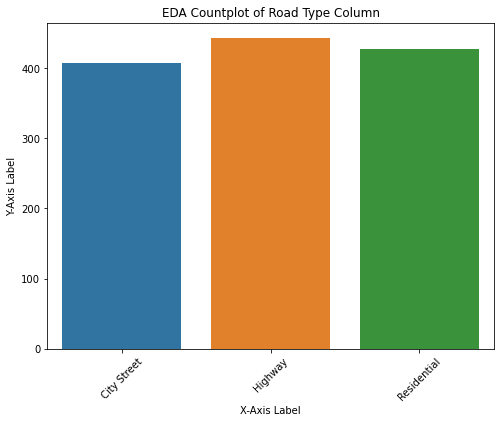

In [10]:
value_counts = df_fin['road_type'].value_counts()

CityStreet = value_counts.get("City Street", 0)
Highway = value_counts.get("Highway", 0)
Residential = value_counts.get("Residential", 0)
print('City Street:',CityStreet)
print('Highway:',Highway)
print('Residential:',Residential)


plt.figure(figsize=(8, 6))
sns.countplot(df_fin['road_type'])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA Countplot of Road Type Column')
plt.xticks(rotation=45)
plt.show()

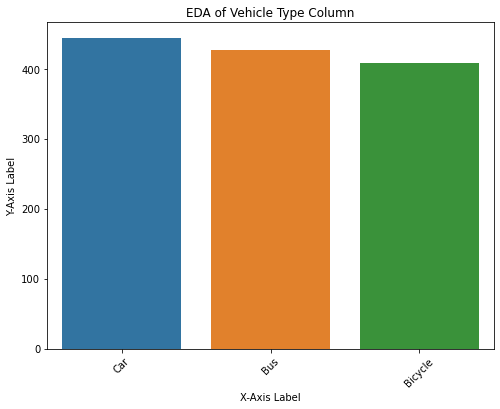

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(df_fin['vehicle_type'])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA of Vehicle Type Column')
plt.xticks(rotation=45)
plt.show()

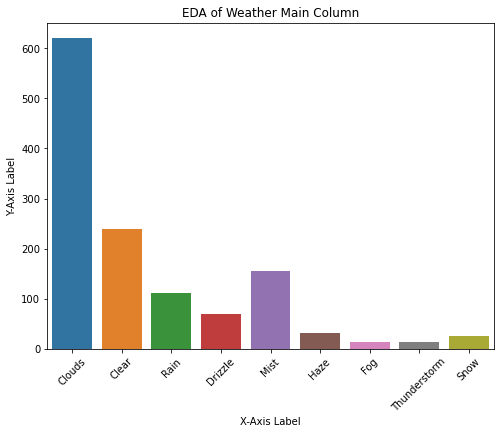

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(df_fin['weather_main'])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA of Weather Main Column')
plt.xticks(rotation=45)
plt.show()

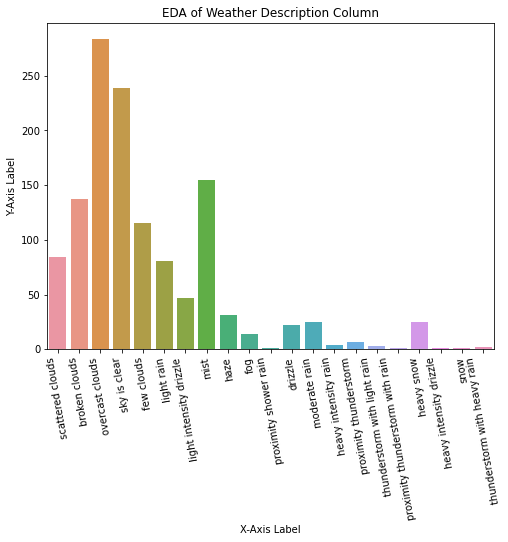

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(df_fin['weather_description'])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA of Weather Description Column')
plt.xticks(rotation=100)
plt.show()

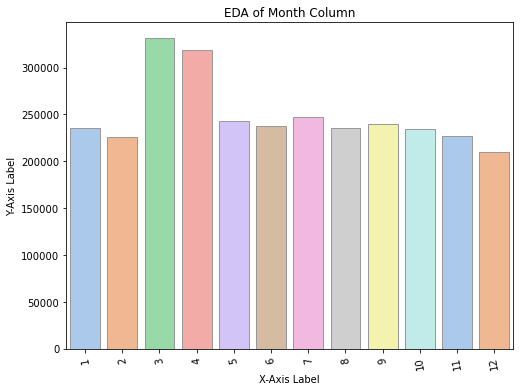

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(merged_df['MONTH'],palette="pastel", edgecolor=".6")
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA of Month Column')
plt.xticks(rotation=100)
plt.show()

sunday: 410727
monday: 421061
tuesday: 432970
wednesday: 434131
thursday: 429411
friday: 432758
saturday: 423801


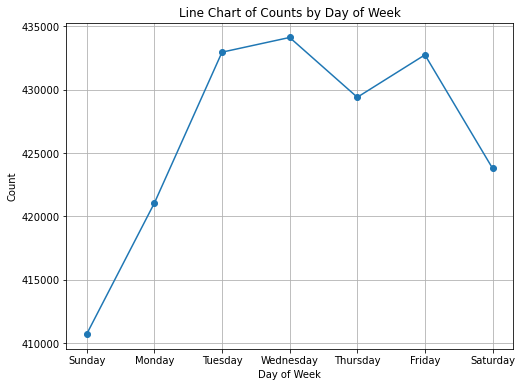

In [15]:
value_counts = merged_df['DAY_OF_WEEK'].value_counts()

sunday = value_counts.get(1, 0)
monday = value_counts.get(2, 0)
tuesday = value_counts.get(3, 0)
wednesday = value_counts.get(4, 0)
thursday = value_counts.get(5, 0)
friday = value_counts.get(6, 0)
saturday = value_counts.get(7, 0)
print('sunday:',sunday)
print('monday:',monday)
print('tuesday:',tuesday)
print('wednesday:',wednesday)
print('thursday:',thursday)
print('friday:',friday)
print('saturday:',saturday)
value_counts = merged_df['DAY_OF_WEEK'].value_counts().sort_index()
plt.figure(figsize=(8, 6))
plt.plot(value_counts.index, value_counts.values, marker='o', linestyle='-')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Line Chart of Counts by Day of Week')
plt.xticks(value_counts.index, ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.grid(True)
plt.show()

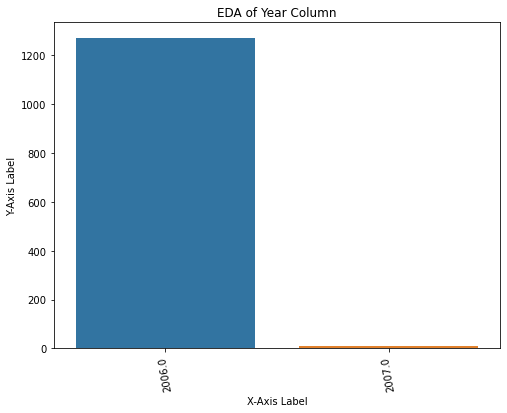

In [16]:
merged_df['Date of Count'] = pd.to_datetime(merged_df['Date of Count'])
merged_df['Year'] = merged_df['Date of Count'].dt.year
plt.figure(figsize=(8, 6))
sns.countplot(merged_df['Year'])
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('EDA of Year Column')
plt.xticks(rotation=100)
plt.show()


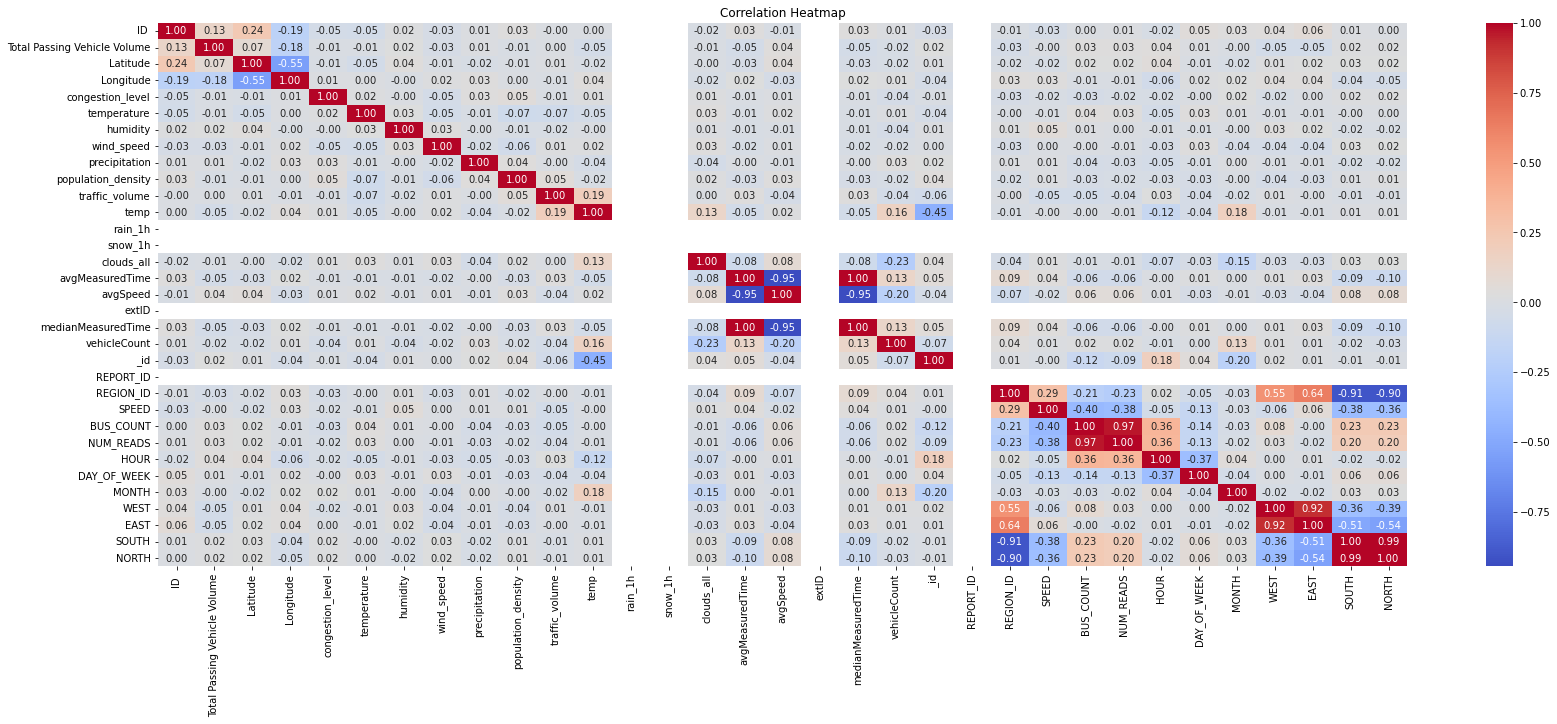

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_fin.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(28, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

X = df_fin['ID '].values.reshape(-1, 1)
y = df_fin['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Using Lasso Regression as the regressor
regressor = Lasso(alpha=0.1) 
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Lasso Regression Mean Squared Error: {mse}')


Lasso Regression Mean Squared Error: 4378808.900444926


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = df_fin['ID '].values.reshape(-1, 1)
y = df_fin['traffic_volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Using Support Vector Machine (SVM) for regression
regressor = SVR(kernel='linear')  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'SVM Regression Mean Squared Error: {mse}')


SVM Regression Mean Squared Error: 4474810.2022150615


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = df_fin['ID '].values.reshape(-1, 1)
y = df_fin['traffic_volume']

# Assuming df has features 'X' and target 'y'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Using K-Nearest Neighbors (KNN) Regression
regressor = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'KNN Regression Mean Squared Error: {mse}')


KNN Regression Mean Squared Error: 5424195.5534375


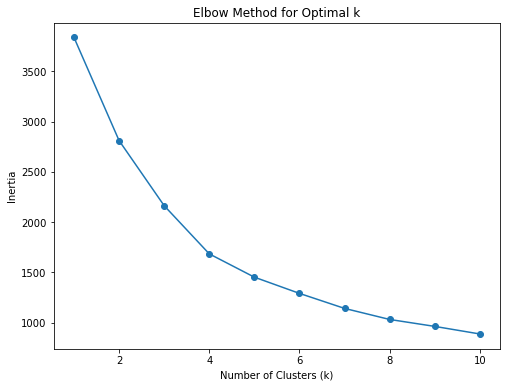

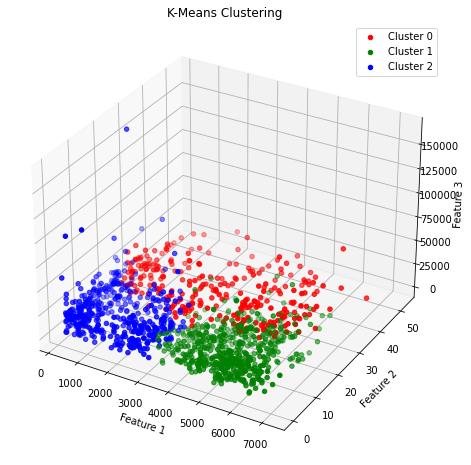

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the features for clustering
features_for_clustering = df_fin[['traffic_volume', 'vehicleCount','Total Passing Vehicle Volume']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method to help choose the number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Choose the optimal number of clusters based on the elbow method (e.g., k=3)
optimal_k = 3

# Apply K-Means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
df_fin['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue']
for i in range(optimal_k):
    cluster_points = df_fin[df_fin['cluster'] == i]
    ax.scatter(cluster_points['traffic_volume'], cluster_points['vehicleCount'], cluster_points['Total Passing Vehicle Volume'], c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('K-Means Clustering')
ax.legend()
plt.show()


Mean Squared Error: 126.75981742280335


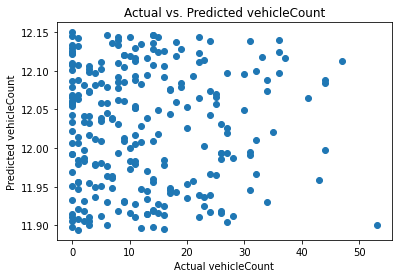

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = df_fin['ID '].values.reshape(-1, 1)
y = df_fin['vehicleCount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual vehicleCount")
plt.ylabel("Predicted vehicleCount")
plt.title("Actual vs. Predicted vehicleCount")
plt.show()

Mean Squared Error: 5907418.001114843


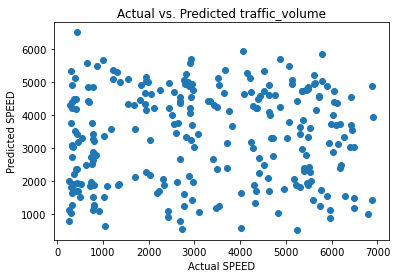

In [26]:
from sklearn.ensemble import RandomForestRegressor

X = df_fin['ID '].values.reshape(-1, 1)
y = df_fin['traffic_volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual traffic_volume")
plt.ylabel("Predicted traffic_volume")
plt.title("Actual vs. Predicted traffic_volume")
plt.show()

Mean Squared Error: 4469035.094424825


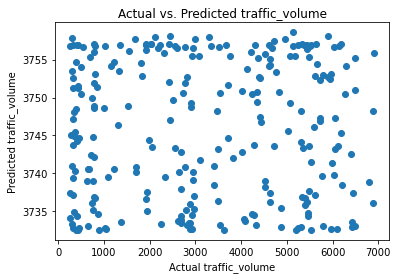

In [28]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

X = df_fin['ID '].values.reshape(-1, 1)
y = df_fin['traffic_volume'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Support Vector Regression (SVR) model
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual traffic_volume")
plt.ylabel("Predicted traffic_volume")
plt.title("Actual vs. Predicted traffic_volume")
plt.show()

Mean Squared Error: 4830013.81640079


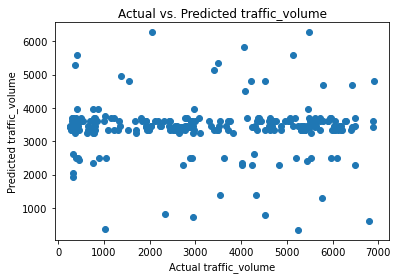

In [27]:
from sklearn.tree import DecisionTreeRegressor

X = df_fin['ID '].values.reshape(-1, 1) 
y = df_fin['traffic_volume'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Created and train a Decision Tree Regressor model
model = DecisionTreeRegressor(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual traffic_volume")
plt.ylabel("Predicted traffic_volume")
plt.title("Actual vs. Predicted traffic_volume")
plt.show()

Mean Squared Error: 169741386.06862354


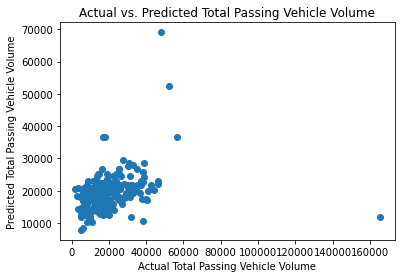

In [84]:
from sklearn.ensemble import GradientBoostingRegressor

# Split the data into features and the target variable
X = df_fin['ID '].values.reshape(-1, 1) 
y = df_fin['Total Passing Vehicle Volume'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Passing Vehicle Volume")
plt.ylabel("Predicted Total Passing Vehicle Volume")
plt.title("Actual vs. Predicted Total Passing Vehicle Volume")
plt.show()